# E-Commerce Dataset - Statistics and Trends
**7PAM2000-0105-2025 – Applied Data Science 1**

**Name:** [Your Name]  
**Student Number:** [Your Student Number]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Reading in the data
I downloaded this ecommerce dataset from kaggle. It has info about products, orders, users and reviews.

In [2]:
prod = pd.read_csv('ecommerce_dataset/products.csv')
ords = pd.read_csv('ecommerce_dataset/orders.csv')
items = pd.read_csv('ecommerce_dataset/order_items.csv')
usrs = pd.read_csv('ecommerce_dataset/users.csv')
revs = pd.read_csv('ecommerce_dataset/reviews.csv')

ords['order_date'] = pd.to_datetime(ords['order_date'])

print(prod.shape)
print(ords.shape)
print(items.shape)

(2000, 6)
(20000, 5)
(43525, 7)


In [3]:
prod.head()

,product_id,product_name,category,brand,price,rating
0,P000001,Astra Be,Clothing,Astra,157.89,4.08
1,P000002,NeoTech Someone,Groceries,NeoTech,21.46,3.87
2,P000003,Acme Discuss,Sports,Acme,265.37,3.46
3,P000004,Nimbus South,Electronics,Nimbus,541.41,4.14
4,P000005,Astra Capital,Home & Kitchen,Astra,198.00,3.97


In [4]:
ords.head()

,order_id,user_id,order_date,order_status,total_amount
0,O00000001,U009310,2025-09-09 14:52:37.292731,processing,689.66
1,O00000002,U003247,2025-04-15 01:18:27.193404,completed,1666.85
2,O00000003,U007252,2025-04-27 15:37:48.008624,processing,665.06
3,O00000004,U008986,2025-10-04 20:35:22.204857,cancelled,689.50
4,O00000005,U008537,2024-11-13 08:15:18.498252,cancelled,860.50


In [ ]:
df = items.merge(prod[['product_id','category','price','rating']], on='product_id')
df = df.merge(ords[['order_id','order_date','order_status']], on='order_id')
df.head()

,order_item_id,order_id,product_id,user_id,quantity,item_price,item_total,category,price,rating,order_date,order_status
0,I00000001,O00000001,P001758,U009310,2,8.07,16.14,Pet Supplies,8.07,2.69,2025-09-09 14:52:37.292731,processing
1,I00000002,O00000001,P001119,U009310,1,74.08,74.08,Beauty,74.08,3.62,2025-09-09 14:52:37.292731,processing
2,I00000003,O00000001,P001794,U009310,1,576.97,576.97,Automotive,576.97,3.89,2025-09-09 14:52:37.292731,processing
3,I00000004,O00000001,P001038,U009310,1,22.47,22.47,Books,22.47,4.85,2025-09-09 14:52:37.292731,processing
4,I00000005,O00000002,P000859,U003247,1,422.22,422.22,Electronics,422.22,3.51,2025-04-15 01:18:27.193404,completed


## Some basic statistics

In [6]:
total_rev = ords['total_amount'].sum()
avg_order = ords['total_amount'].mean()
med_order = ords['total_amount'].median()
std_order = ords['total_amount'].std()

print('Total revenue:', round(total_rev,2))
print('Avg order:', round(avg_order,2))
print('Median:', round(med_order,2))
print('Std dev:', round(std_order,2))

Total revenue: 11918668.95
Avg order: 595.93
Median: 308.19
Std dev: 776.06


In [7]:
print(prod['category'].value_counts())
print()
print(ords['order_status'].value_counts())

category
Clothing          213
Toys              213
Pet Supplies      212
Beauty            207
Electronics       203
Home & Kitchen    199
Books             194
Automotive        193
Groceries         183
Sports            183
Name: count, dtype: int64

order_status
shipped       4113
returned      4066
completed     4021
cancelled     3920
processing    3880
Name: count, dtype: int64


## Plot 1 - Bar chart showing revenue per category
I want to see which categories are making the most money

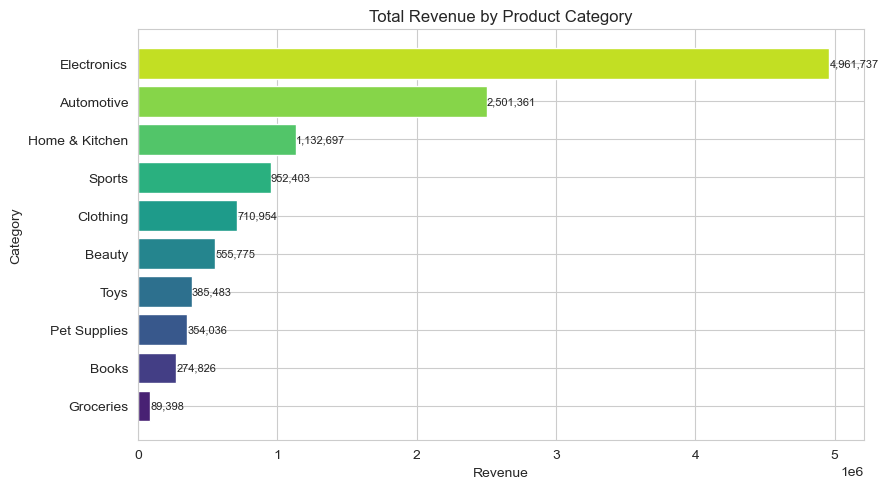

In [8]:
cat_totals = df.groupby('category')['item_total'].sum()
cat_totals = cat_totals.sort_values()

plt.figure(figsize=(9,5))
clrs = sns.color_palette('viridis', len(cat_totals))
b = plt.barh(cat_totals.index, cat_totals.values, color=clrs)

for bar in b:
    val = bar.get_width()
    plt.text(val + 1000, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', va='center', fontsize=8)

plt.xlabel('Revenue')
plt.ylabel('Category')
plt.title('Total Revenue by Product Category')
plt.tight_layout()
plt.savefig('plot1_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print('Highest:', cat_totals.idxmax(), '-', round(cat_totals.max(),2))
print('Lowest:', cat_totals.idxmin(), '-', round(cat_totals.min(),2))
print('Mean:', round(cat_totals.mean(),2))
print('Std:', round(cat_totals.std(),2))

Highest: Electronics - 4961736.6
Lowest: Groceries - 89398.16
Mean: 1191866.9
Std: 1491905.69


## Plot 2 - Scatter plot of price vs rating
Checking if theres a link between product price and customer ratings

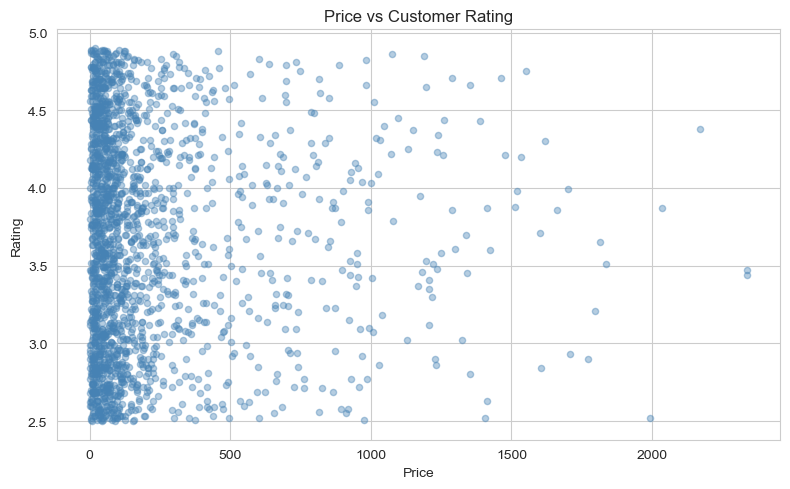

Correlation: -0.0047


In [10]:
plt.figure(figsize=(8,5))
plt.scatter(prod['price'], prod['rating'], alpha=0.4, s=20, color='steelblue')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Customer Rating')
plt.tight_layout()
plt.savefig('plot2_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

r_val = prod['price'].corr(prod['rating'])
print('Correlation:', round(r_val, 4))

## Plot 3 - Heatmap of correlations
Looking at how all the numeric columns relate to each other

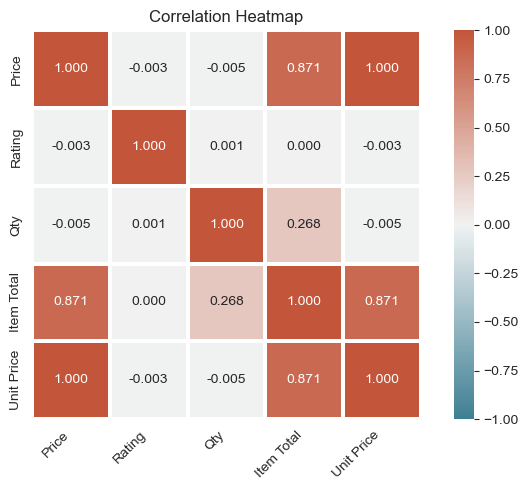

            Price  Rating    Qty  Item Total  Unit Price
Price       1.000  -0.003 -0.005       0.871       1.000
Rating     -0.003   1.000  0.001       0.000      -0.003
Qty        -0.005   0.001  1.000       0.268      -0.005
Item Total  0.871   0.000  0.268       1.000       0.871
Unit Price  1.000  -0.003 -0.005       0.871       1.000


In [11]:
nums = df[['price','rating','quantity','item_total','item_price']]
nums.columns = ['Price','Rating','Qty','Item Total','Unit Price']

corr_mat = nums.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_mat, annot=True, fmt='.3f', center=0, square=True, 
            linewidths=1.5, linecolor='white', vmin=-1, vmax=1,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot3_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(corr_mat.round(3))